# Proyek Analisis Data: Bike Sharing Dataset
- Nama:Rahmad Rudiansyah Siregar
- Email:rrudiansyahsiregar@gmail.com
- Id Dicoding:rrudiansyah

## Menentukan Pertanyaan Bisnis

- Pada musim apa penyewaan sepada paling banyak?
- Bagaimana pengaruh cuaca pada penyewaan sepeda ?

## Menyiapkan semua library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
#Mengambil data set dan menampilkannya

In [7]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [8]:
# Memeriksa data missing value
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Memeriksa duplikat data
day_df.duplicated().sum()

0

In [10]:
# melihat informasi mengenai dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Cleaning Data

In [11]:
# menghapus kolom instant dan dteday karena tidak diperlukan
day_df.drop(['instant','dteday'], axis=1, inplace=True)
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
# menghapus kolom holiday karena sudah terdapat pada kolom workingday
day_df.drop(['holiday'], axis=1, inplace=True)
day_df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
# mengganti nama kolom agar lebih mudah dibaca
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'week_day','workingday':'working_day',
                      'weathersit':'weather_situation','atemp':'temp_feel','hum':'humidity','windspeed':'wind_speed',
                      'cnt':'count'}, inplace=True)

In [14]:
day_df.head()

,season,year,month,week_day,working_day,weather_situation,temp,temp_feel,humidity,wind_speed,casual,registered,count
0,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
# Melihat rangkuman parameter statistik
day_df.describe()

,season,year,month,week_day,working_day,weather_situation,temp,temp_feel,humidity,wind_speed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
bike_sharing_df = day_df.copy(deep=True)

In [17]:
bike_sharing_df.season.value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [18]:
# Membuat penamaan pada kolom season
season_code = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike_sharing_df['season'] = bike_sharing_df['season'].map(season_code)

In [19]:
bike_sharing_df.season.value_counts()

fall      188
summer    184
spring    181
winter    178
Name: season, dtype: int64

In [20]:
bike_sharing_df.weather_situation.value_counts()

1    463
2    247
3     21
Name: weather_situation, dtype: int64

In [21]:
# Membuat penamaan pada kolom weather_situation
weathersit_code = {1:'Clear', 2:'Mist', 3:'Light Snow'}
bike_sharing_df['weather_situation'] = bike_sharing_df['weather_situation'].map(weathersit_code)

In [22]:
bike_sharing_df.weather_situation.value_counts()

Clear         463
Mist          247
Light Snow     21
Name: weather_situation, dtype: int64

In [23]:
bike_sharing_df.working_day.value_counts()

1    500
0    231
Name: working_day, dtype: int64

In [24]:
# Membuat penamaan pada kolom working_day
workingday_code = {1:'working_day', 0:'holiday'}
bike_sharing_df['working_day'] = bike_sharing_df['working_day'].map(workingday_code)

In [25]:
bike_sharing_df.working_day.value_counts()

working_day    500
holiday        231
Name: working_day, dtype: int64

In [26]:
bike_sharing_df.month.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: month, dtype: int64

In [27]:
# Mengganti nama kode pada kolom month
month_code = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'Mei',6:'Jun',
             7:'Jul',8:'Agt',9:'Sept',10:'Okt',11:'Nov',12:'Des'}
bike_sharing_df['month']=bike_sharing_df['month'].map(month_code)

In [28]:
bike_sharing_df.month.value_counts()

Jan     62
Mar     62
Mei     62
Jul     62
Agt     62
Okt     62
Des     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     57
Name: month, dtype: int64

In [29]:
bike_sharing_df.week_day.value_counts()

6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: week_day, dtype: int64

In [30]:
# Mengganti nama kode pada kolom week_day
weekday_code = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_sharing_df['week_day'] = bike_sharing_df['week_day'].map(weekday_code)

In [31]:
bike_sharing_df.week_day.value_counts()

Sun    105
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Name: week_day, dtype: int64

In [32]:
bike_sharing_df.year.value_counts()

1    366
0    365
Name: year, dtype: int64

In [33]:
year_code = {0:'2011',1:'2012'}
bike_sharing_df['year'] = bike_sharing_df['year'].map(year_code)

In [34]:
bike_sharing_df.year.value_counts()

2012    366
2011    365
Name: year, dtype: int64

In [35]:
bike_sharing_df.head()

,season,year,month,week_day,working_day,weather_situation,temp,temp_feel,humidity,wind_speed,casual,registered,count
0,spring,2011,Jan,Sun,holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,spring,2011,Jan,Mon,holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,spring,2011,Jan,Tue,working_day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,spring,2011,Jan,Wed,working_day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,spring,2011,Jan,Thu,working_day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [36]:
bike_sharing_df.groupby(by="season").agg({
    'registered':['mean','max','min']
})

registered           
               mean   max  min
season                        
fall    4441.691489  6917  889
spring  2269.204420  5315  416
summer  3886.233696  6456  674
winter  3999.050562  6946   20

In [37]:
bike_sharing_df.groupby(by="week_day").agg({
    'registered':['mean','max','min']
})

registered            
                 mean   max   min
week_day                         
Fri       4076.298077  6781   416
Mon       2890.533333  5657   451
Sat       3938.000000  6917  1129
Sun       3085.285714  5966   570
Thu       3997.394231  6946   432
Tue       3663.990476  6435    20
Wed       3954.480769  6697   573

In [38]:
bike_sharing_df.groupby(by="working_day").agg({
    'registered':['mean','max','min']
})

registered           
                    mean   max  min
working_day                        
holiday      2959.034632  5966  451
working_day  3978.250000  6946   20



## Visualization & Explanatory Analysis

   ### Pertanyaan 1: Pada Season Apa sepeda paling banyak dan paling sedikit disewa ?

In [39]:
sum_registered = bike_sharing_df.groupby("season").registered.sum().sort_values(ascending=False).reset_index()

In [40]:
sum_registered.head()

,season,registered
0,fall,835038
1,summer,715067
2,winter,711831
3,spring,410726


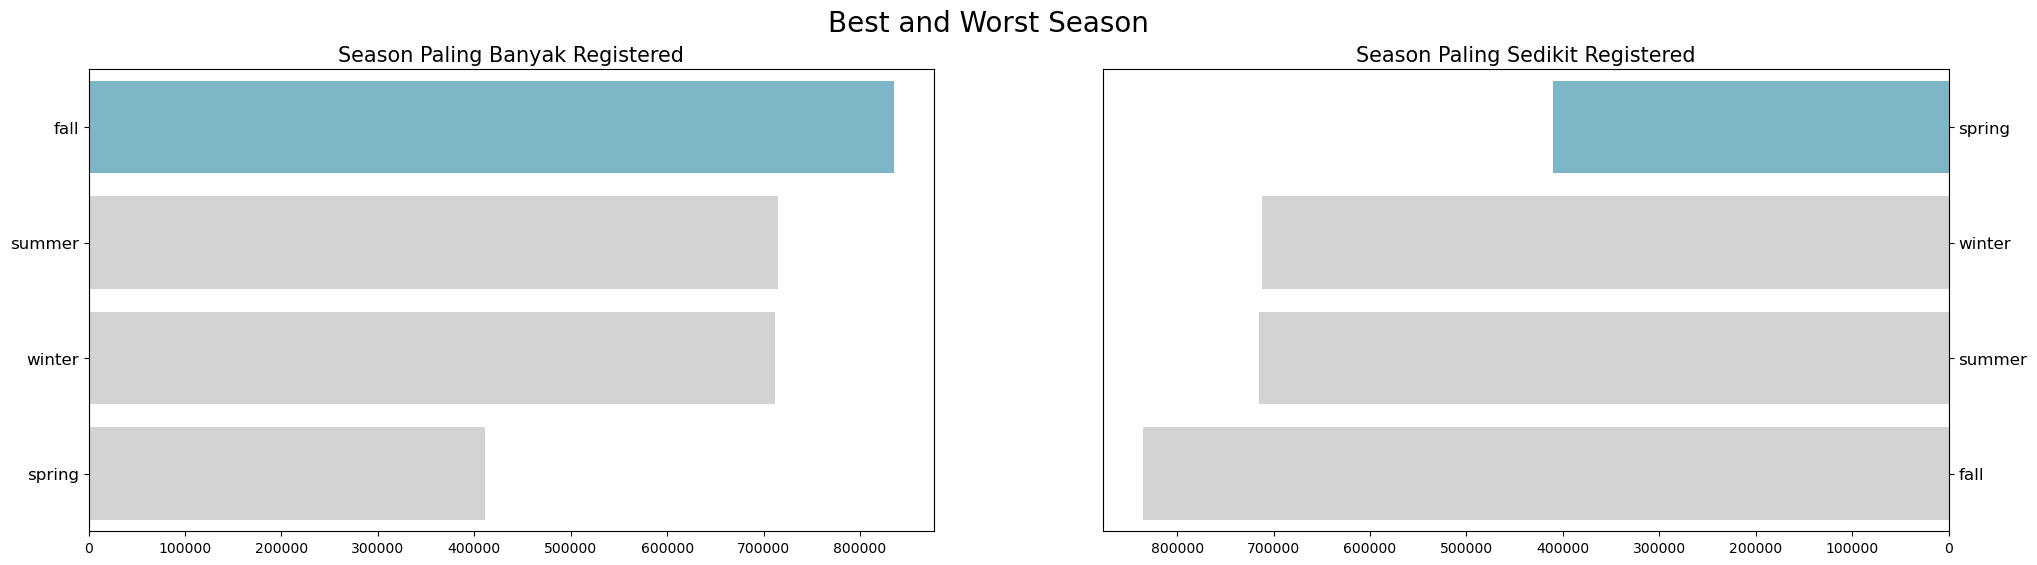

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="registered", y="season", data=sum_registered.head(), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Season Paling Banyak Registered", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="registered", y="season", data=sum_registered.sort_values(by="registered", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Season Paling Sedikit Registered", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Season", fontsize=20)
plt.show()

### Pertanyaan 2: Bagaimana pengaruh cuaca/weather_situation dalam penyewaan sepeda ?

In [42]:
sum_weathersit = bike_sharing_df.groupby("weather_situation").registered.sum().sort_values(ascending=False).reset_index()

In [43]:
sum_weathersit.head()

,weather_situation,registered
0,Clear,1811606
1,Mist,827082
2,Light Snow,33974


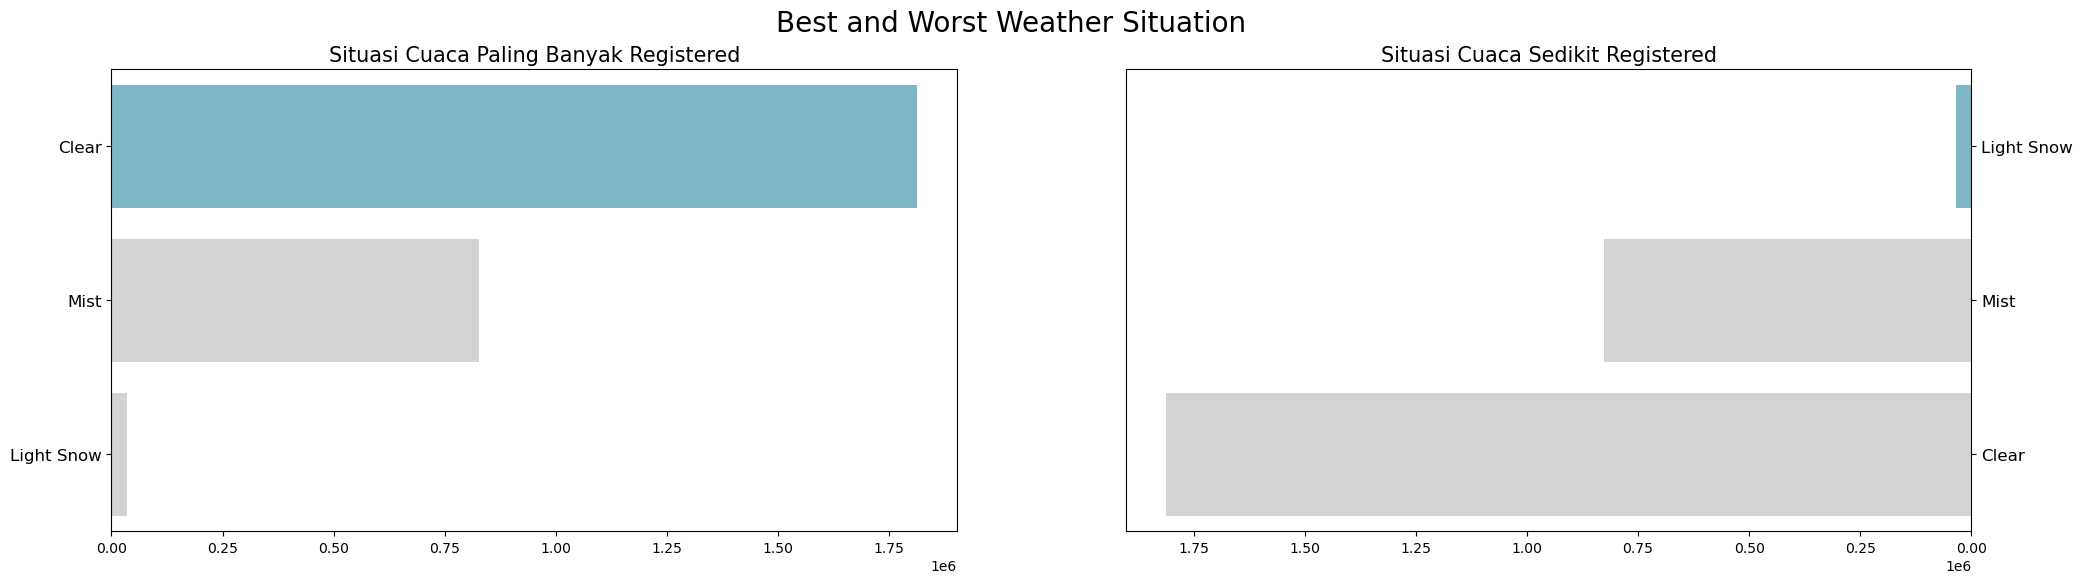

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="registered", y="weather_situation", data=sum_weathersit.head(), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Situasi Cuaca Paling Banyak Registered", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="registered", y="weather_situation", data=sum_weathersit.sort_values(by="registered", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Situasi Cuaca Sedikit Registered", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Weather Situation", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : dapat dilihat pada EDA dan Visualisasi pelanggan yang melakukan registrasi penyewaan sepeda paling banyak dilakukan pada musim gugur / fall sehingga pada musim ini operator dapat lebih mempersiapkan ketersediaan sepeda agar pelanggan dapat terlayani dengan baik.
- conclution pertanyaan 2 : dapat dilihat pada EDA dan visualisasi cuaca sangat berpengaruh dalam penyewaan sepeda dimana pada cuaca light snow atau salju sangat sedikit pelanggan yang melakukan registrasi pada musim tersebut.

In [45]:
# bike_sharing_df.to_csv("all_data.csv", index=False)